In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
!ls dataset/tomato_leaf_diseases

'Training Set'	'Validation Set'


In [14]:
train_data_path = "dataset/tomato_leaf_diseases/Training Set/"
test_data_path = "dataset/tomato_leaf_diseases/Validation Set/"

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   vertical_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory(train_data_path,
                                                 target_size = (224, 224),
                                                 batch_size = 200,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [29]:
testing_set = valid_datagen.flow_from_directory(test_data_path,
                                            target_size = (224, 224),
                                            batch_size = 70,
                                            class_mode = 'categorical')

Found 7000 images belonging to 10 classes.


In [20]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [25]:
model = keras.Sequential([
    layers.Input((224, 224, 3)),
    layers.Conv2D(20, kernel_size=(5, 5), activation="relu"), # 224, 224, 3 => 220, 220, 20
    layers.MaxPooling2D((2, 2)), # 220, 220, 20 => 110, 110, 20
    layers.Conv2D(20, kernel_size=(7, 7), strides=(2, 2), activation="relu"), # 110, 110, 20 => 52, 52, 20
    layers.Conv2D(20, kernel_size=(3, 3), activation="relu"), # 52, 52, 20 => 50, 50, 20
    layers.MaxPooling2D((2, 2)), # 50, 50, 20 => 25, 25, 20
    layers.Conv2D(20, kernel_size=(7, 7), activation="relu"), # 25, 25, 20 => 19, 19, 20
    layers.MaxPooling2D((2, 2)), # 19, 19, 20, => 8, 8, 20 
    layers.Conv2D(10, kernel_size=(1, 1), activation="relu"), # 8, 8, 20 => 8, 8, 10
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 220, 220, 20)      1520      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 20)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 20)        19620     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 20)        3620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 19, 20)        19620     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 20)         

In [27]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy,
             metrics=["accuracy"])

In [30]:
model.fit(training_set, validation_data=testing_set, epochs=15)

Epoch 1/15
50/50 [==============================] - 230s 4s/step - loss: 2.2782 - accuracy: 0.1110 - val_loss: 2.1267 - val_accuracy: 0.1870
Epoch 2/15
50/50 [==============================] - 98s 2s/step - loss: 2.0552 - accuracy: 0.2280 - val_loss: 1.8089 - val_accuracy: 0.3294
Epoch 3/15
50/50 [==============================] - 102s 2s/step - loss: 1.7365 - accuracy: 0.3710 - val_loss: 1.5120 - val_accuracy: 0.4710
Epoch 4/15
50/50 [==============================] - 101s 2s/step - loss: 1.4711 - accuracy: 0.4943 - val_loss: 1.3445 - val_accuracy: 0.5367
Epoch 5/15
50/50 [==============================] - 102s 2s/step - loss: 1.2559 - accuracy: 0.5617 - val_loss: 1.1481 - val_accuracy: 0.6059
Epoch 6/15
50/50 [==============================] - 103s 2s/step - loss: 1.1290 - accuracy: 0.6096 - val_loss: 1.1457 - val_accuracy: 0.6133
Epoch 7/15
50/50 [==============================] - 102s 2s/step - loss: 1.0412 - accuracy: 0.6412 - val_loss: 1.0018 - val_accuracy: 0.6517
Epoch 8/15
50/

In [38]:
import matplotlib.pyplot as plt
#plt.plot(model.history.epoch)
model.history.epoch[3]
#plt.plot(model.history["val_accuracy"])

3

In [39]:
model.save("0.75val_accuracy")

INFO:tensorflow:Assets written to: 0.75val_accuracy/assets


In [40]:
mod = model.fit(training_set, validation_data=testing_set, epochs=3)

Epoch 1/3
50/50 [==============================] - 98s 2s/step - loss: 0.6204 - accuracy: 0.7859 - val_loss: 0.7369 - val_accuracy: 0.7467
Epoch 2/3
50/50 [==============================] - 100s 2s/step - loss: 0.6044 - accuracy: 0.7877 - val_loss: 0.6018 - val_accuracy: 0.7873
Epoch 3/3
50/50 [==============================] - 104s 2s/step - loss: 0.5758 - accuracy: 0.7980 - val_loss: 0.6053 - val_accuracy: 0.7954


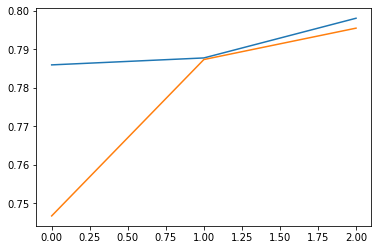

In [41]:
plt.plot(mod.history["accuracy"])
plt.plot(mod.history["val_accuracy"])

In [333]:
model.save("0.80val_accuracy")

INFO:tensorflow:Assets written to: 0.80val_accuracy/assets


In [360]:
# messed up, reverting to last save
#model = keras.models.load_model("0.75val_accuracy")
model.evaluate(testing_set)

100/100 [==============================] - 12s 122ms/step - loss: 0.6414 - accuracy: 0.7760


[0.6413723230361938, 0.7760000228881836]

In [357]:
opt_to_jump = keras.optimizers.SGD(learning_rate=0.00005, momentum=0.05, nesterov=True)

In [352]:
opt_to_jump = keras.optimizers.Ftrl(learning_rate=0.00000000009, learning_rate_power=-0.9)

In [345]:
opt_to_jump = keras.optimizers.Adam(learning_rate=0.001)

In [358]:
model.compile(optimizer=opt_to_jump, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [359]:
mod = model.fit(training_set, epochs=3,)

Epoch 1/3
50/50 [==============================] - 90s 2s/step - loss: 0.5871 - accuracy: 0.7974
Epoch 2/3
37/50 [=====================>........] - ETA: 24s - loss: 0.5966 - accuracy: 0.7919

KeyboardInterrupt: 

In [ ]:
plt.plot(mod.history["accuracy"])
plt.plot(mod.history["val_accuracy"])

In [361]:
model.predict(testing_set)

array([[1.1138927e-07, 2.5823203e-04, 5.9253915e-05, ..., 1.4466515e-07,
        2.4553095e-05, 2.0054825e-01],
       [2.8942095e-03, 4.3654460e-03, 6.8975314e-05, ..., 7.3502028e-01,
        2.0310204e-01, 4.4520104e-10],
       [2.9697223e-02, 7.0439887e-01, 2.0466702e-01, ..., 7.5629971e-04,
        1.8782004e-07, 3.3057745e-08],
       ...,
       [1.4792320e-06, 1.1702653e-01, 5.9807044e-01, ..., 6.3953063e-05,
        1.2388363e-09, 7.2458912e-05],
       [4.6474255e-05, 3.0361882e-03, 8.9163547e-03, ..., 8.6443550e-05,
        4.3901221e-07, 2.8806123e-01],
       [3.0547944e-06, 9.9899981e-04, 4.9790519e-06, ..., 1.2136498e-05,
        6.8145618e-04, 7.0652300e-03]], dtype=float32)

In [444]:
a = next(testing_set)

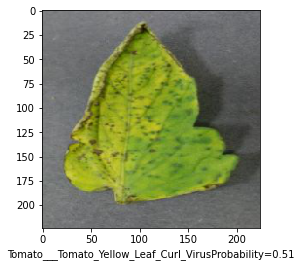

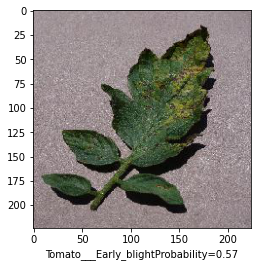

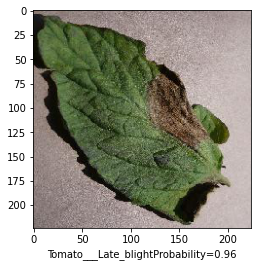

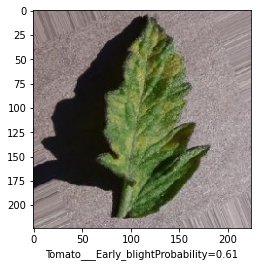

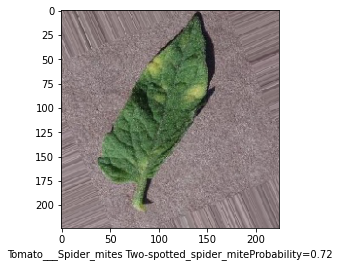

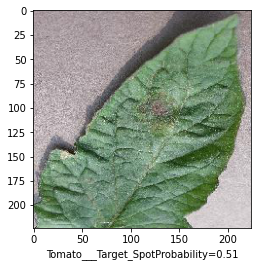

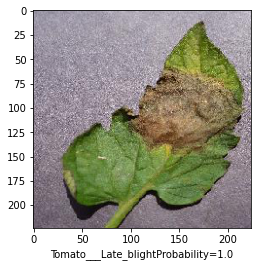

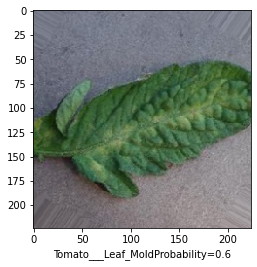

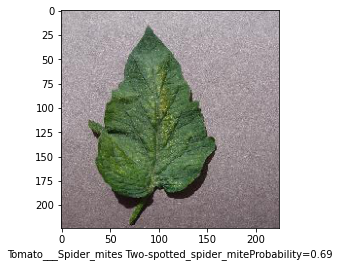

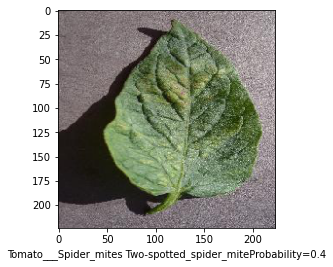

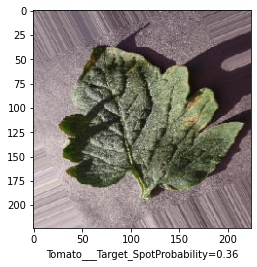

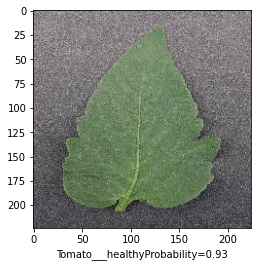

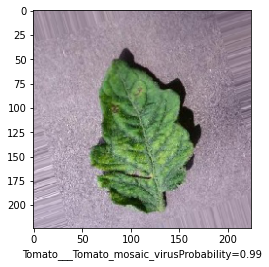

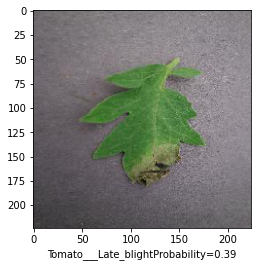

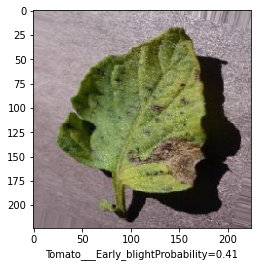

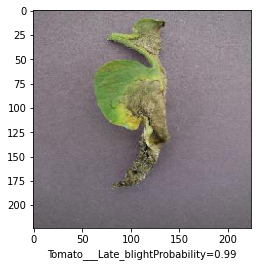

In [445]:
prediction = model.predict(a[0])
for im, i in zip(a[0][:16], range(16)):
    plt.figure()
    plt.imshow(im)
    pp = i
    lis = []
    for i in prediction[pp]:
        lis.append(round(i, 2))
    prob = max(lis)

    plt.xlabel(list(testing_set.class_indices.keys())[np.argmax(prediction[pp])]+"Probability="+str(prob))
    

#print(prediction)

In [430]:
import numpy as np
pp = 14
print(list(testing_set.class_indices.keys())[np.argmax(prediction[pp])])
lis = []
for i in prediction[pp]:
    lis.append(round(i, 2))
print(max(lis))

Tomato___healthy
0.96
